# Advanced Regression Assignment

# Housing Price Prediction

**Problem statement**


*   Surprise Housing, a housing company located in the United States, has decided to enter the Australian market. The company employs data analytics to buy houses for less than their true value and then resell them for more. To enter the market, the company is seeking for potential properties to purchase. 
*   To predict the actual value of the prospective properties and decide whether or not to invest in them, we must build a regression model using regularisation.



**The company wants to know the following**


*   Which factors have a role in determining the price of a house?
*   How well those variables accurately predict the price of a house.



**Business Goal**

*   With the available independent variables, we needed to model the price of houses. The management will then utilise this model to figure out how the prices change depending on the variables.
*   They can then adjust the firm's strategy and focus on regions that will generate large profits.



# Importing all Required packages

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
from datetime import date
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Reading the data

In [3]:
#For reading the data in google drive to google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Reading the csv file from google drive for Exploratory data analysis
Housing_Price=pd.read_csv('/content/drive/MyDrive/train.csv')

# Understanding the data

In [5]:
# dataset shape
Housing_Price.shape

(1460, 81)

In [6]:
# Dataset info
Housing_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Dispalying first 5 rows of the dataset
pd.set_option('display.max_columns',81)
Housing_Price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
# Describing the dataset
Housing_Price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
# Checking duplicate rows in dataset
Housing_Price[Housing_Price.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

**Observation**

*   There are no duplicate rows



In [10]:
# Missing percentage values of the columns in the dataset
pd.set_option('display.max_rows',85)
100*(Housing_Price.isnull().sum()/Housing_Price.shape[0])

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

**Note:**

 - From Data Dictionary NA has meaning for each column specified below:
 
["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [11]:
# Replacing 'NA' value to 'NAl' no alley
Housing_Price['Alley'].fillna('NAl',inplace=True)

In [12]:
# Imputing null value with 'None'
Val = ['MasVnrType','PoolQC', 'Fence', 'MiscFeature']
for i in Val:
    Housing_Price[i].fillna('None',inplace=True)

In [13]:
# Replacing 'NA' value to 'NB' no basement
Val = ['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']
for i in Val:
    Housing_Price[i].fillna('NB',inplace=True)

In [14]:
# Replacing 'NA' value to 'NF' no fireplace
Housing_Price['FireplaceQu'].fillna('NF',inplace=True)

In [15]:
# Replacing 'NA' value to 'NG' no garage

Val = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in Val:
    Housing_Price[i].fillna('NG',inplace=True)

In [16]:
# Missing percentage values of the columns in the dataset
list_null=100*(Housing_Price.isnull().sum()/Housing_Price.shape[0])
list_null=list_null[list_null>0]
list_null.sort_values(inplace=True, ascending=False)
list_null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [17]:
# From data dictionary "LotFrontage" is Linear feet of street connected to property.
Housing_Price['LotFrontage'] = Housing_Price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Imputing null values with 0 as there are some properties with out garage
Housing_Price['GarageYrBlt'].fillna(0, inplace=True)

# Imputing null values with 0 as there is no Masonry veneer area
Housing_Price['MasVnrArea'].fillna(0,inplace=True)

# Imputing null values with mode
Housing_Price['Electrical'].fillna('SBrkr',inplace=True)

In [18]:
# Missing percentage values of the columns in the dataset
list_null=100*(Housing_Price.isnull().sum()/Housing_Price.shape[0])
list_null=list_null[list_null>0]
list_null.sort_values(inplace=True, ascending=False)
list_null

Series([], dtype: float64)

**Observation**

*   There are no null values in dataset



# Data preparation, Cleaning and Visualization

In [19]:
# Few numerical columns should be considered as  categorical variables
var=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','GarageCars','TotRmsAbvGrd','Fireplaces']
Housing_Price[var]=Housing_Price[var].astype("object")

In [20]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in Housing_Price.columns:
    if Housing_Price[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [21]:
# Finding the lengths of numerical and categorical columns
print('numerical columns length:',len(num_col))
print('categorical columns length:',len(cat_col))

numerical columns length: 26
categorical columns length: 55


In [22]:
# Finding the value counts of the categorical columns
for i in cat_col:
    print("----------",i,"------------")
    print(Housing_Price[i].value_counts())

---------- MSSubClass ------------
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
---------- MSZoning ------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---------- Street ------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
---------- Alley ------------
NAl     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
---------- LotShape ------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
---------- LandContour ------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
---------- Utilities ------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
---------- LotConfig ------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, d

**Visualization of categorical data**

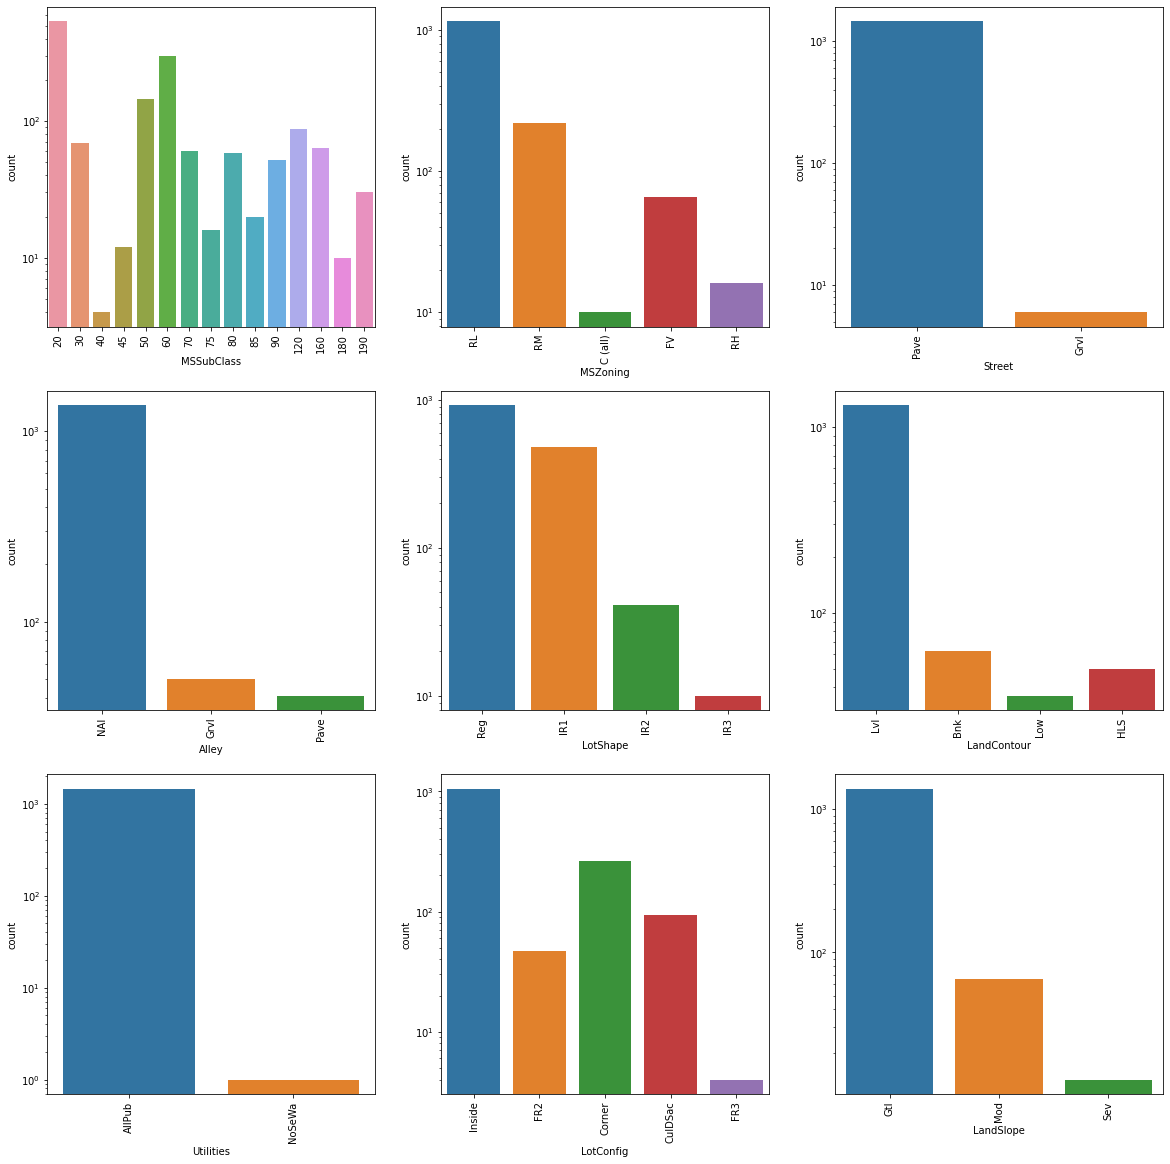

In [23]:
#Finding the unique values in categorical feaures
a=cat_col[0:9] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Observation:**
- 'Street','Alley','LandContour','Utilities','LandSlope' are highly skewed and can be dropped.

In [24]:
# Dropping features which are highly skewed
Housing_Price.drop(['Street','Alley','LandContour','LandSlope','Utilities'], axis=1, inplace=True)

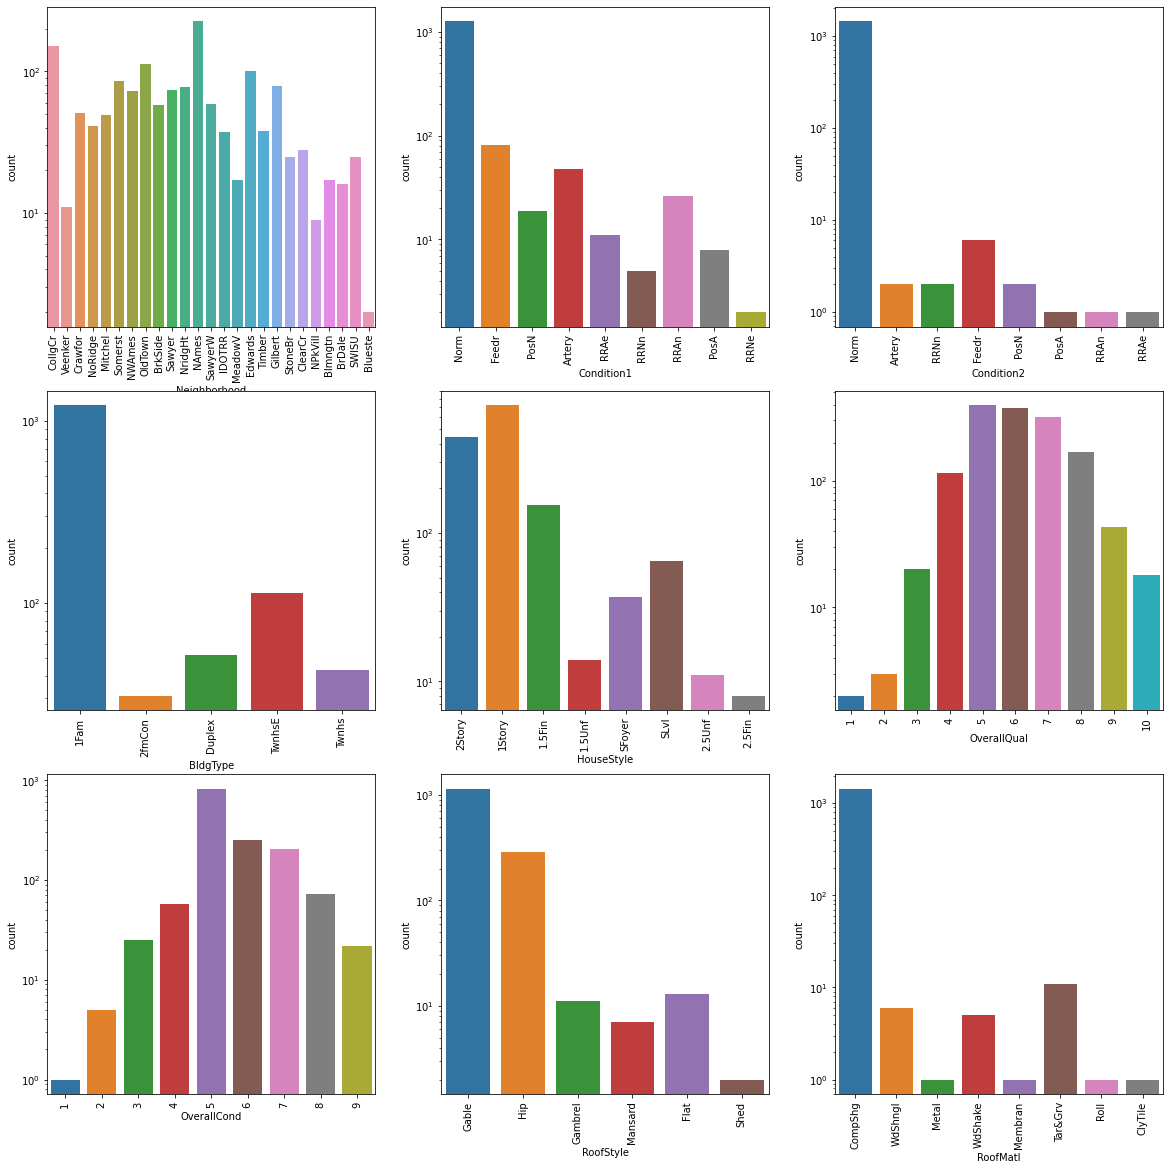

In [25]:
#Finding the unique values in categorical feaures
a=cat_col[9:18] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Observation:**
- 'Condition1','Condition2','BldgType','RoofMatl' is highly skewed and can be dropped.

In [26]:
# Dropping features which are highly skewed
Housing_Price.drop(['Condition1','Condition2','BldgType','RoofMatl'], axis=1, inplace=True)

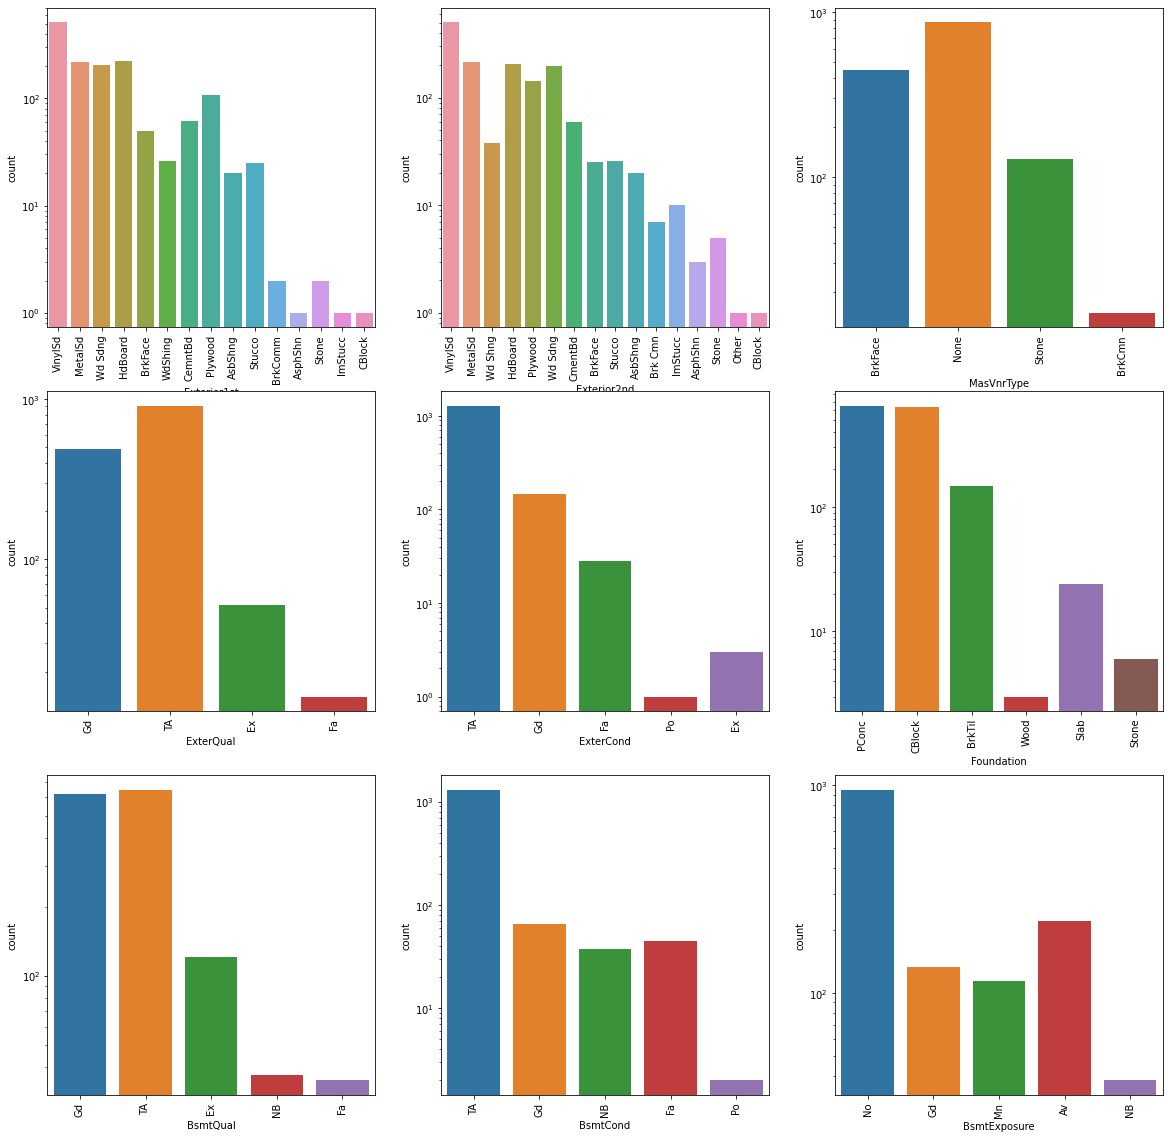

In [27]:
#Finding the unique values in categorical feaures
a=cat_col[18:27] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Observation:**
- Everything looks good

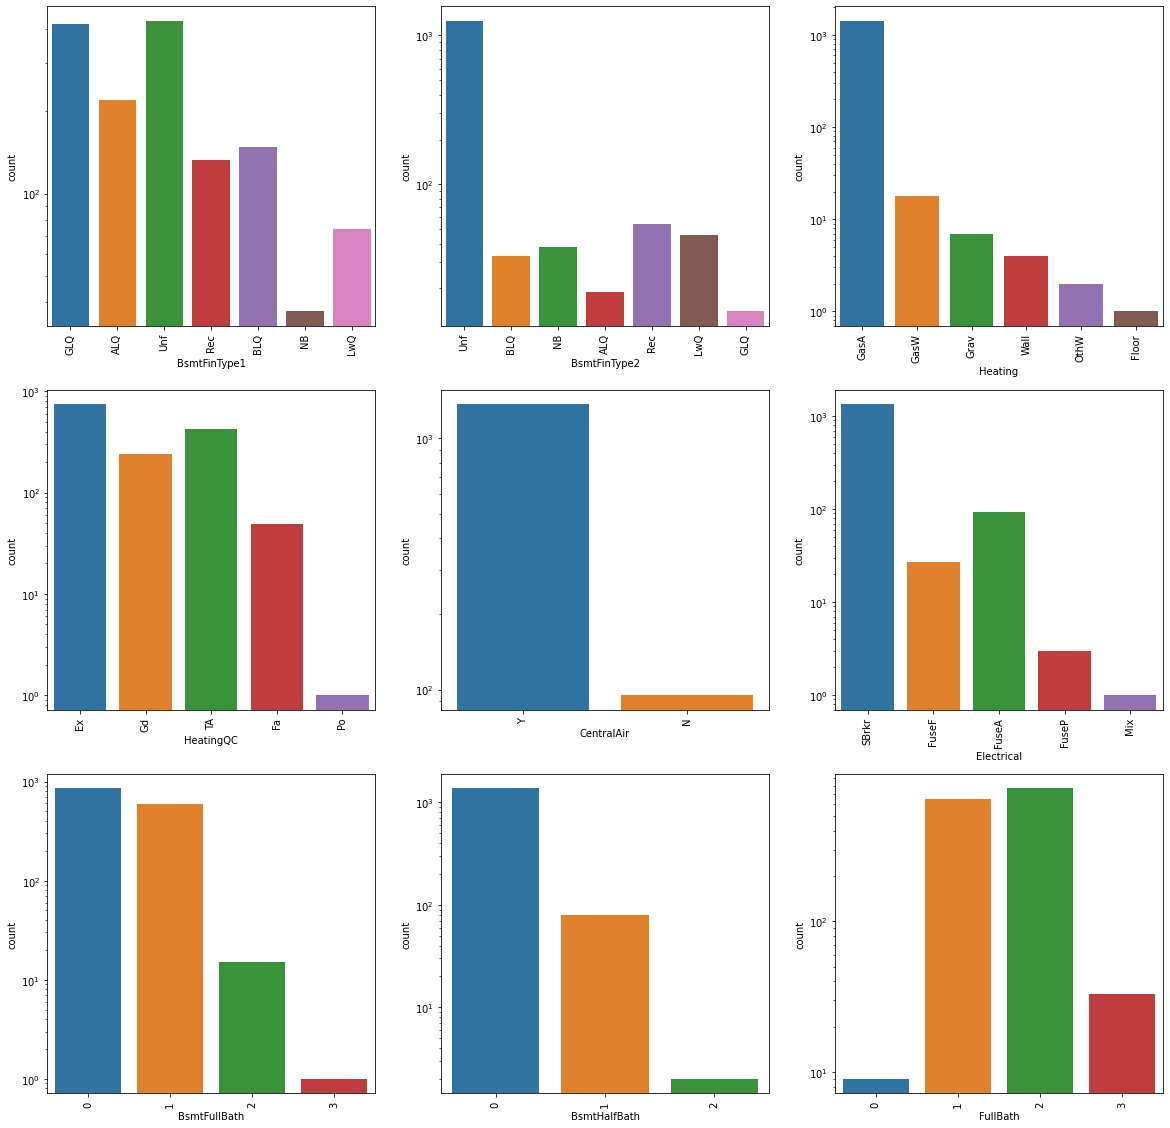

In [28]:
#checking the unique values in categorical feaures
a=cat_col[27:36] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Observation:**
- 'BsmtFinType2','BsmtHalfBath','CentralAir','Electrical','Heating' is skewed and can be dropped.

In [29]:
# Dropping features which are highly skewed
Housing_Price.drop(['BsmtFinType2','BsmtHalfBath', 'Heating','CentralAir','Electrical'], axis=1, inplace=True)

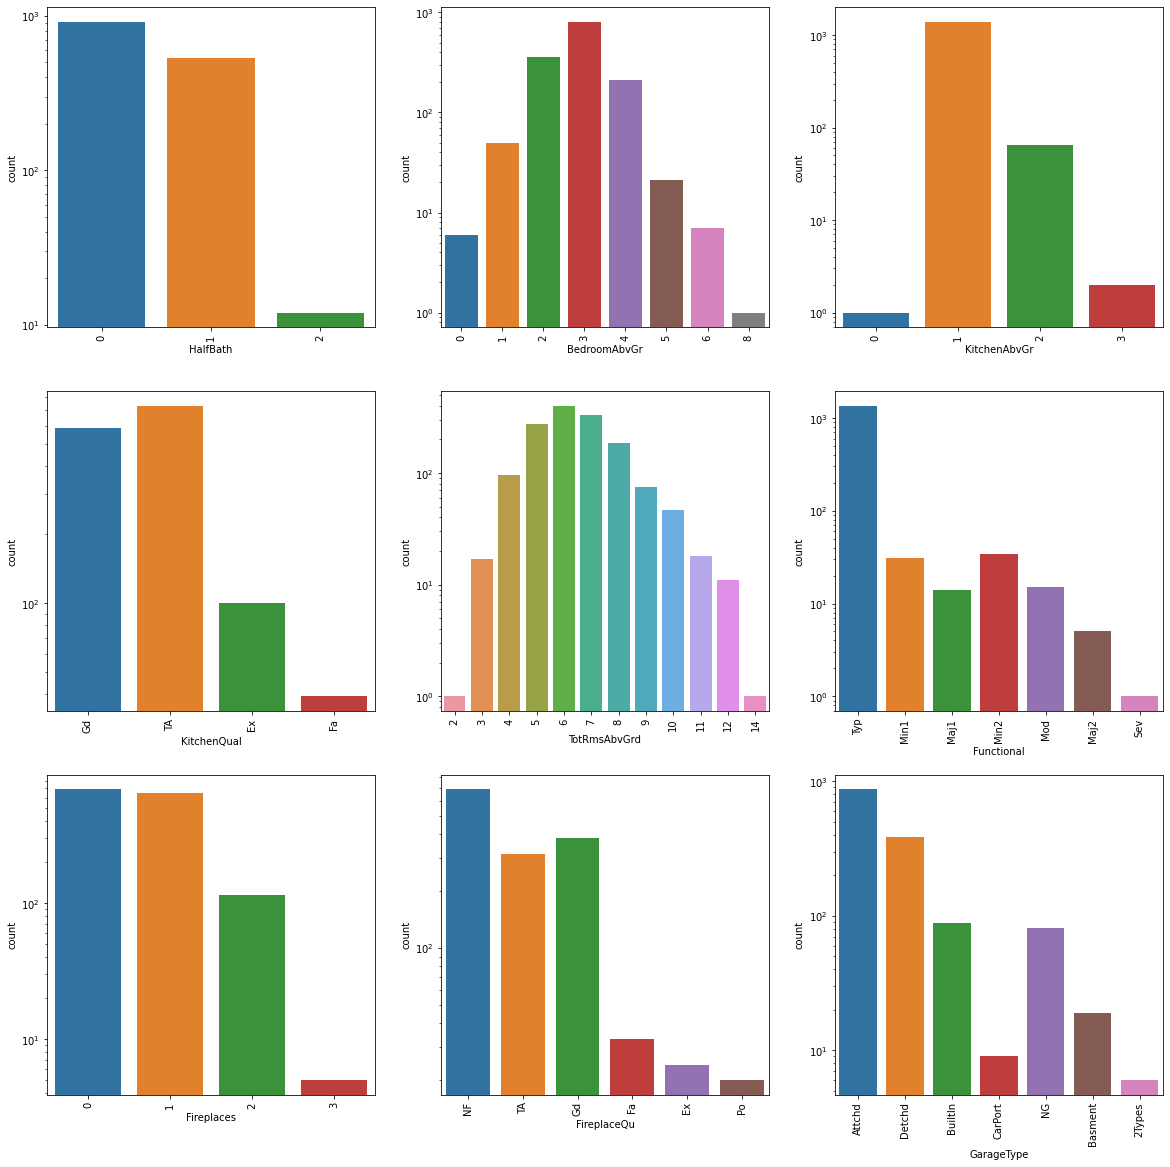

In [30]:
#checking the unique values in categorical feaures
a=cat_col[36:45] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

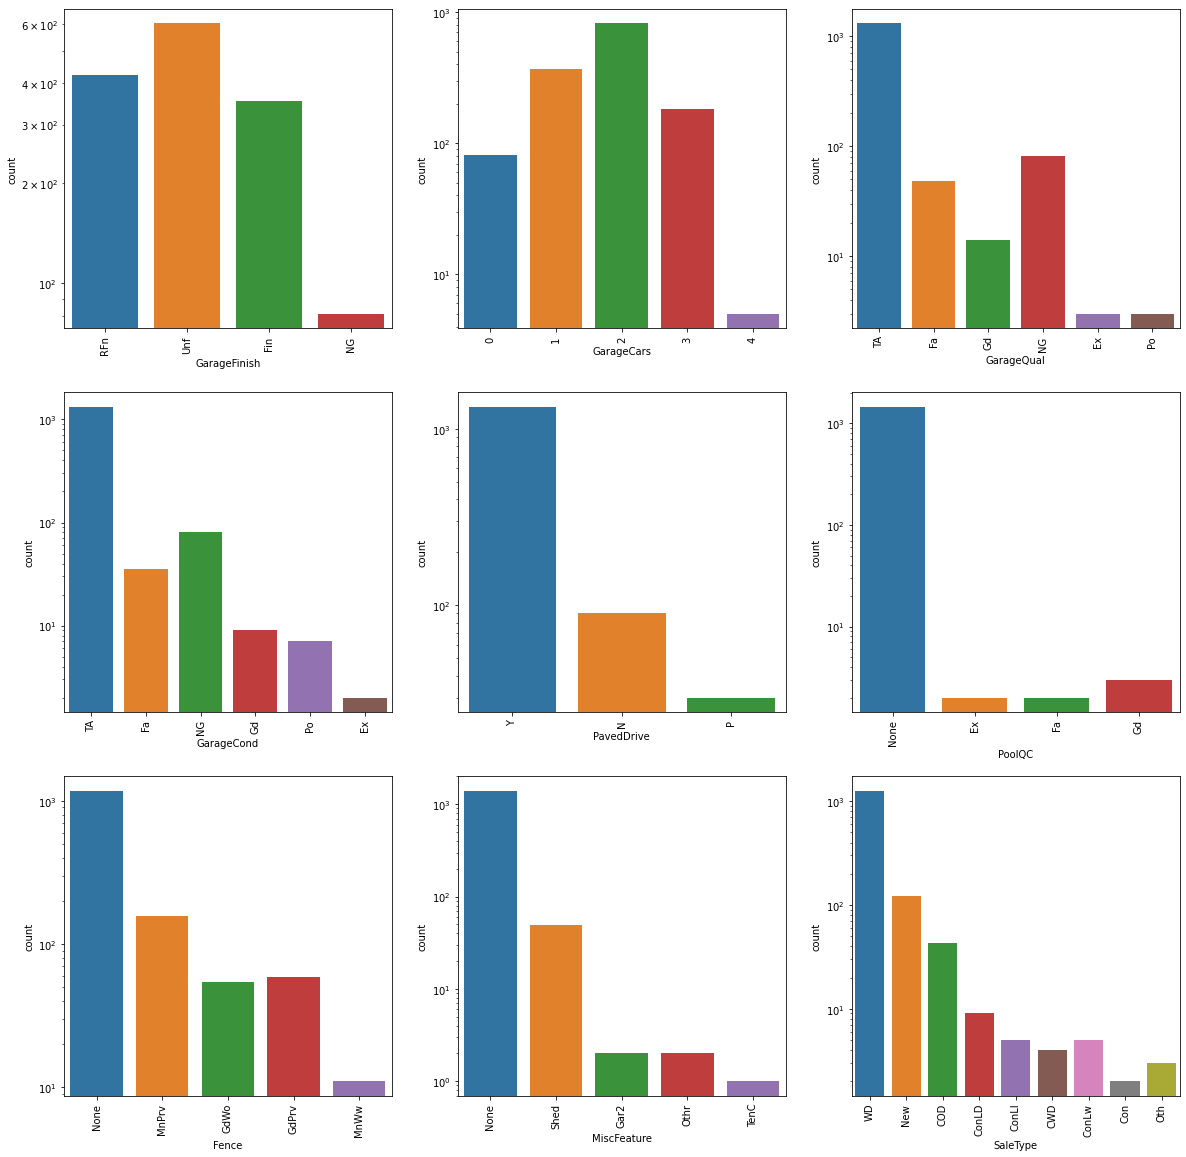

In [31]:
#checking the unique values in categorical feaures
a=cat_col[45:54] 
plt.figure(figsize=(20,20))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(x =j, data = Housing_Price)
    plt.yscale('log')
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Observation:**
- 'GarageQual','GarageCond','Functional','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition' can be dropped as the skewness is high.

In [32]:
# Dropping features which are highly skewed
Housing_Price.drop(['GarageQual','Functional','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'], axis=1, inplace=True)

**Derived metrics**

In [33]:
# 1stFlrSF: First Floor square feet ,2ndFlrSF: Second floor square feet
Housing_Price['TotalSF']=Housing_Price['1stFlrSF']+Housing_Price['2ndFlrSF']

In [34]:
# Dropping the original features
Housing_Price.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

In [35]:
# Calculating the house age , remodelled age, garage built year and year sold based on the current year
Housing_Price['House_Age'] = pd.datetime.now().year - Housing_Price['YearBuilt']
Housing_Price['Remodelled_Age'] = pd.datetime.now().year - Housing_Price['YearRemodAdd']
Housing_Price['GarageYrBlt_Age'] = Housing_Price['GarageYrBlt'].apply(lambda x: 0 if x==0 else pd.datetime.now().year - x)
Housing_Price['YrSold'] = Housing_Price['YrSold'].apply(lambda x: 0 if x==0 else pd.datetime.now().year - x)

In [36]:
# Dropping the original features
Housing_Price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

**Outliers identification and treatment**

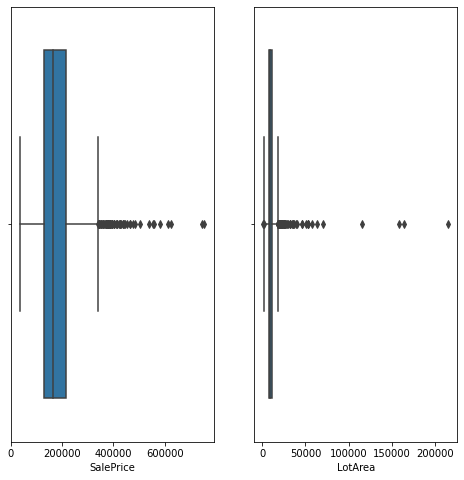

In [37]:
plt.figure(figsize=(8,8))
x=['SalePrice','LotArea']
for i,j in enumerate(x):
    plt.subplot(1,2,i+1)
    sns.boxplot(Housing_Price[j])
plt.show()

In [38]:
# Removing (statistical) outliers from SalePrice
Q1 = Housing_Price['SalePrice'].quantile(0.05)
Q3 = Housing_Price['SalePrice'].quantile(0.95)
IQR = Q3 - Q1
Housing_Price = Housing_Price[(Housing_Price['SalePrice'] >= Q1 - 1.5*IQR) & (Housing_Price['SalePrice'] <= Q3 + 1.5*IQR)]

In [39]:
# Removing (statistical) outliers from LotArea
Q1 = Housing_Price['LotArea'].quantile(0.05)
Q3 = Housing_Price['LotArea'].quantile(0.95)
IQR = Q3 - Q1
Housing_Price = Housing_Price[(Housing_Price['LotArea']>= Q1 - 1.5*IQR) & (Housing_Price['LotArea'] <= Q3 + 1.5*IQR)]

In [40]:
# Removing (statistical) outliers from MiscVal
Q1 = Housing_Price['MiscVal'].quantile(0.05)
Q3 = Housing_Price['MiscVal'].quantile(0.95)
IQR = Q3 - Q1
Housing_Price = Housing_Price[(Housing_Price['MiscVal'] >= Q1 - 1.5*IQR) & (Housing_Price['MiscVal'] <= Q3 + 1.5*IQR)]

In [41]:
# Shape of the dataframe
Housing_Price.shape

(1393, 56)

In [42]:
# Calculating percentage of data lost because of outlier treatment
((1460-Housing_Price.shape[0])/1460)*100

4.589041095890411

**Observation:**
- Approximately 4.6% of the data is lost which is fine

**Visualization of numerical features**

In [43]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in Housing_Price.columns:
    if Housing_Price[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


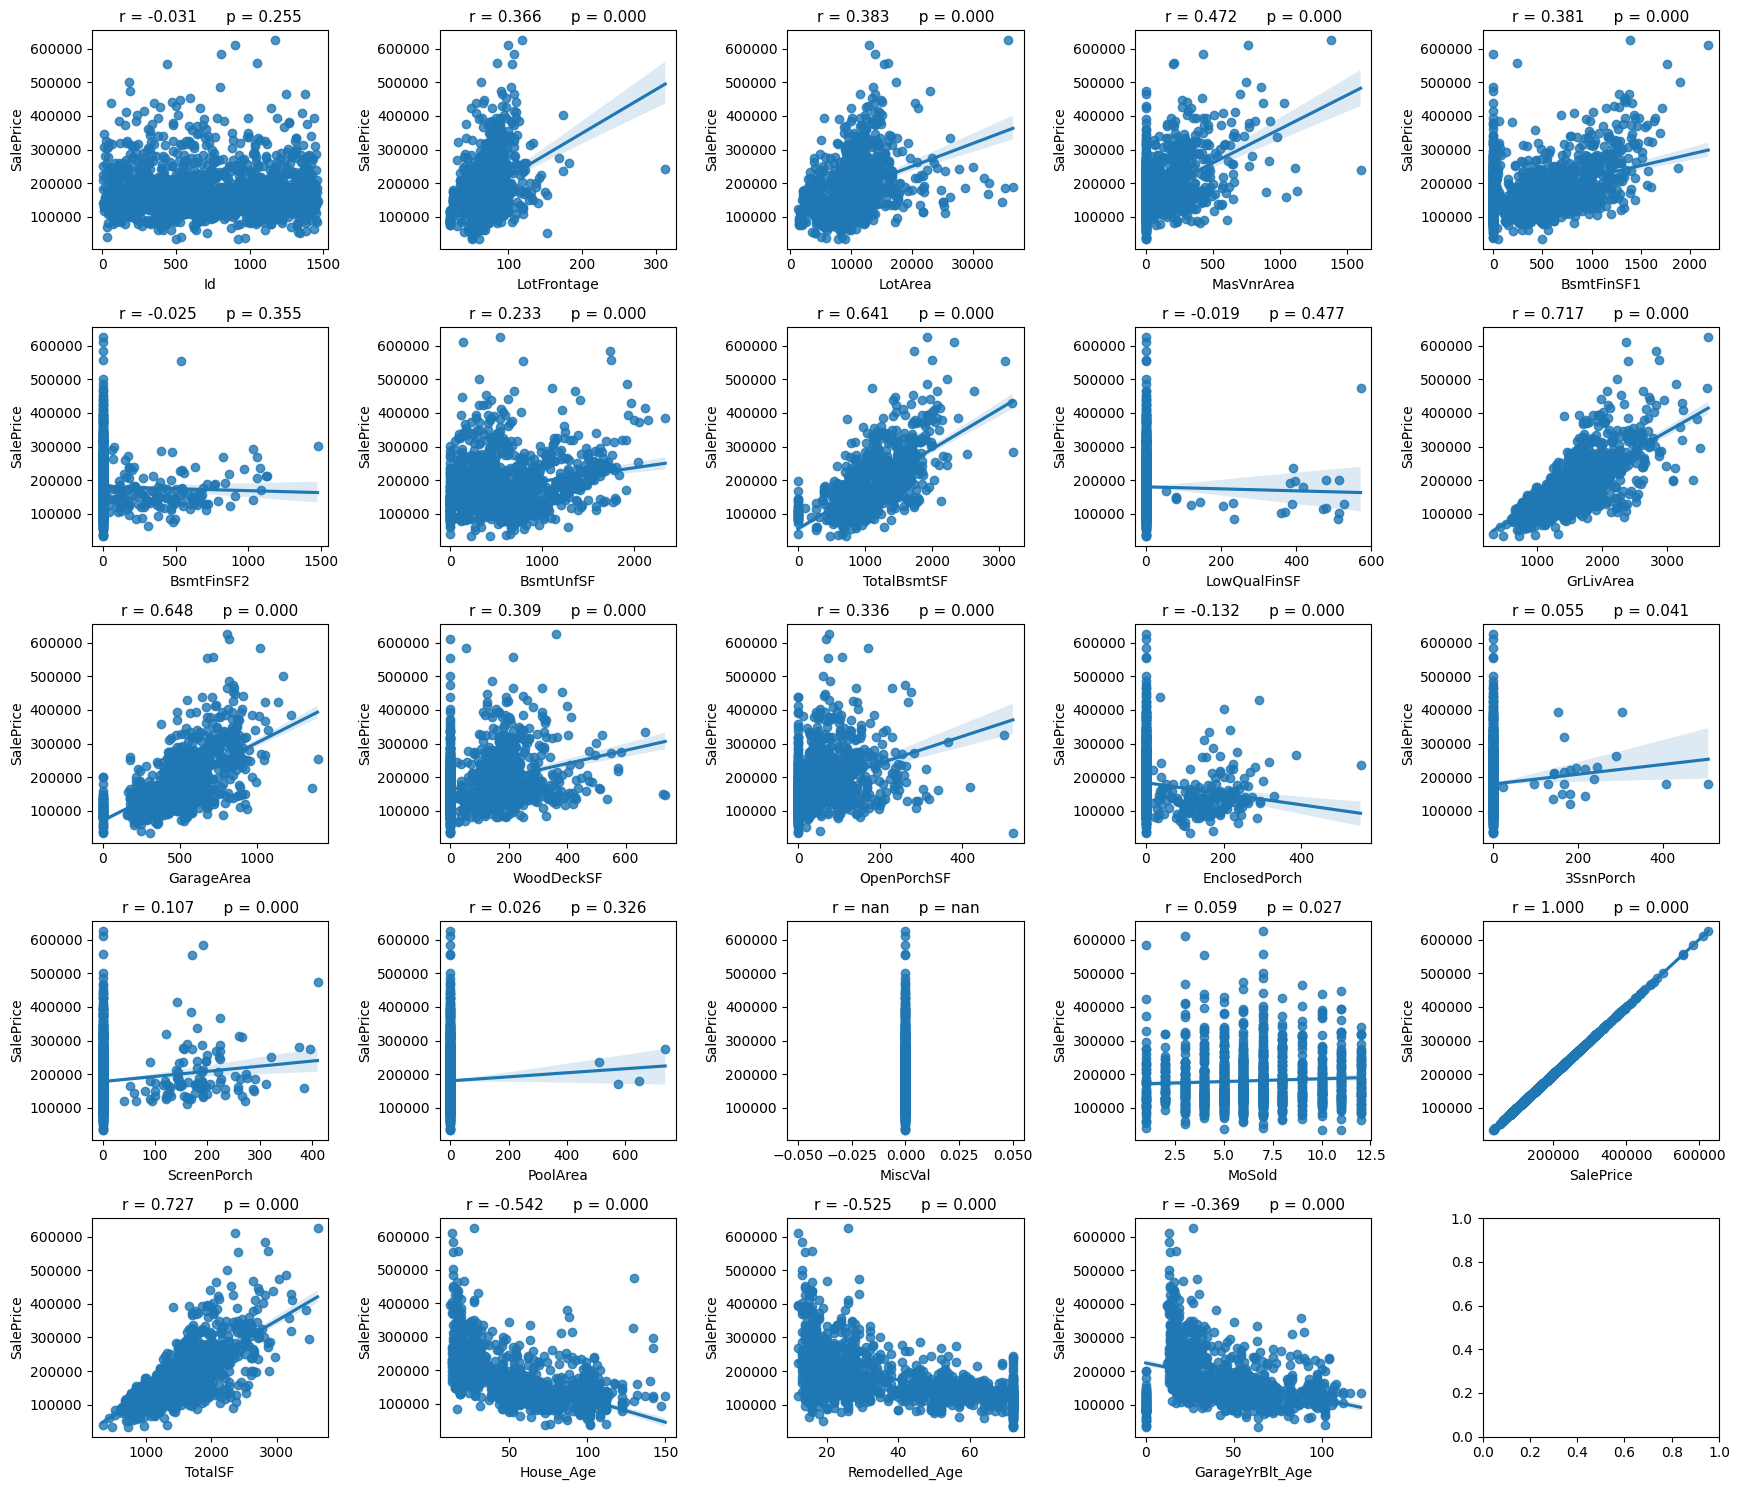

In [44]:
# Visualising all the numerical features against price column

rows = 5
cols = 5
fig, axs = plt.subplots(rows,cols, figsize=(cols*3.5,rows*3),dpi=100)

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(num_col):
            sns.regplot(Housing_Price[num_col[i]], Housing_Price['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(Housing_Price[num_col[i]], Housing_Price['SalePrice'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

**Observation:**
- 'Id','BsmtFinSF2','LowQualFinSF','PoolArea','3SsnPorch','MiscVal', 'MoSold' have high P values and can be dropped

In [45]:
# Dropping features which have high P values
Housing_Price.drop(['Id','BsmtFinSF2','LowQualFinSF','PoolArea','3SsnPorch','MiscVal', 'MoSold'], axis=1, inplace=True)

In [46]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in Housing_Price.columns:
    if Housing_Price[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


In [47]:
# correlation of numerical columns
cor = Housing_Price.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage         1.000000  0.563424    0.176629    0.141822   0.134108   
LotArea             0.563424  1.000000    0.144075    0.188242   0.078938   
MasVnrArea          0.176629  0.144075    1.000000    0.225220   0.113904   
BsmtFinSF1          0.141822  0.188242    0.225220    1.000000  -0.528180   
BsmtUnfSF           0.134108  0.078938    0.113904   -0.528180   1.000000   
TotalBsmtSF         0.311736  0.308161    0.330785    0.448492   0.452656   
GrLivArea           0.341427  0.394075    0.358893    0.107535   0.259474   
GarageArea          0.319267  0.314310    0.362792    0.263154   0.192550   
WoodDeckSF          0.089029  0.169023    0.156188    0.178882   0.008335   
OpenPorchSF         0.118024  0.145929    0.104140    0.070288   0.128135   
EnclosedPorch       0.012970  0.010357   -0.112962   -0.111879   0.000283   
ScreenPorch         0.055028  0.104444    0.067750    0.066044  -0.015231   
SalePrice           0.366400  0.383321    0.471831    0.380870   0.233244   
TotalSF             0.340805  0.394465    0.369611    0.114776   0.259954   
House_Age          -0.115845 -0.042616   -0.306487   -0.246188  -0.153138   
Remodelled_Age     -0.083193 -0.021439   -0.167508   -0.122274  -0.180342   
GarageYrBlt_Age    -0.012703  0.050259   -0.178919   -0.094236  -0.163050   

                 TotalBsmtSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
LotFrontage         0.311736   0.341427    0.319267    0.089029     0.118024   
LotArea             0.308161   0.394075    0.314310    0.169023     0.145929   
MasVnrArea          0.330785   0.358893    0.362792    0.156188     0.104140   
BsmtFinSF1          0.448492   0.107535    0.263154    0.178882     0.070288   
BsmtUnfSF           0.452656   0.259474    0.192550    0.008335     0.128135   
TotalBsmtSF         1.000000   0.387518    0.475384    0.226688     0.214446   
GrLivArea           0.387518   1.000000    0.463856    0.231078     0.298609   
GarageArea          0.475384   0.463856    1.000000    0.220196     0.236583   
WoodDeckSF          0.226688   0.231078    0.220196    1.000000     0.049764   
OpenPorchSF         0.214446   0.298609    0.236583    0.049764     1.000000   
EnclosedPorch      -0.100364   0.011126   -0.125004   -0.134287    -0.097444   
ScreenPorch         0.086262   0.081622    0.053367   -0.085491     0.034940   
SalePrice           0.640628   0.717158    0.648136    0.308950     0.336041   
TotalSF             0.394816   0.995162    0.475895    0.235962     0.299250   
House_Age          -0.403234  -0.190826   -0.484926   -0.229418    -0.192354   
Remodelled_Age     -0.295435  -0.288959   -0.379147   -0.205541    -0.233708   
GarageYrBlt_Age    -0.238953  -0.151511   -0.238449   -0.170463    -0.206845   

                 EnclosedPorch  ScreenPorch  SalePrice   TotalSF  House_Age  \
LotFrontage           0.012970     0.055028   0.366400  0.340805  -0.115845   
LotArea               0.010357     0.104444   0.383321  0.394465  -0.042616   
MasVnrArea           -0.112962     0.067750   0.471831  0.369611  -0.306487   
BsmtFinSF1           -0.111879     0.066044   0.380870  0.114776  -0.246188   
BsmtUnfSF             0.000283    -0.015231   0.233244  0.259954  -0.153138   
TotalBsmtSF          -0.100364     0.086262   0.640628  0.394816  -0.403234   
GrLivArea             0.011126     0.081622   0.717158  0.995162  -0.190826   
GarageArea           -0.125004     0.053367   0.648136  0.475895  -0.484926   
WoodDeckSF           -0.134287    -0.085491   0.308950  0.235962  -0.229418   
OpenPorchSF          -0.097444     0.034940   0.336041  0.299250  -0.192354   
EnclosedPorch         1.000000    -0.083923  -0.132053  0.004549   0.401062   
ScreenPorch          -0.083923     1.000000   0.106764  0.079240   0.041278   
SalePrice            -0.132053     0.106764   1.000000  0.726883  -0.542149   
TotalSF               0.004549     0.079240   0.726883  1.000000  -0.211160   
Hous

<Figure size 1440x1440 with 0 Axes>

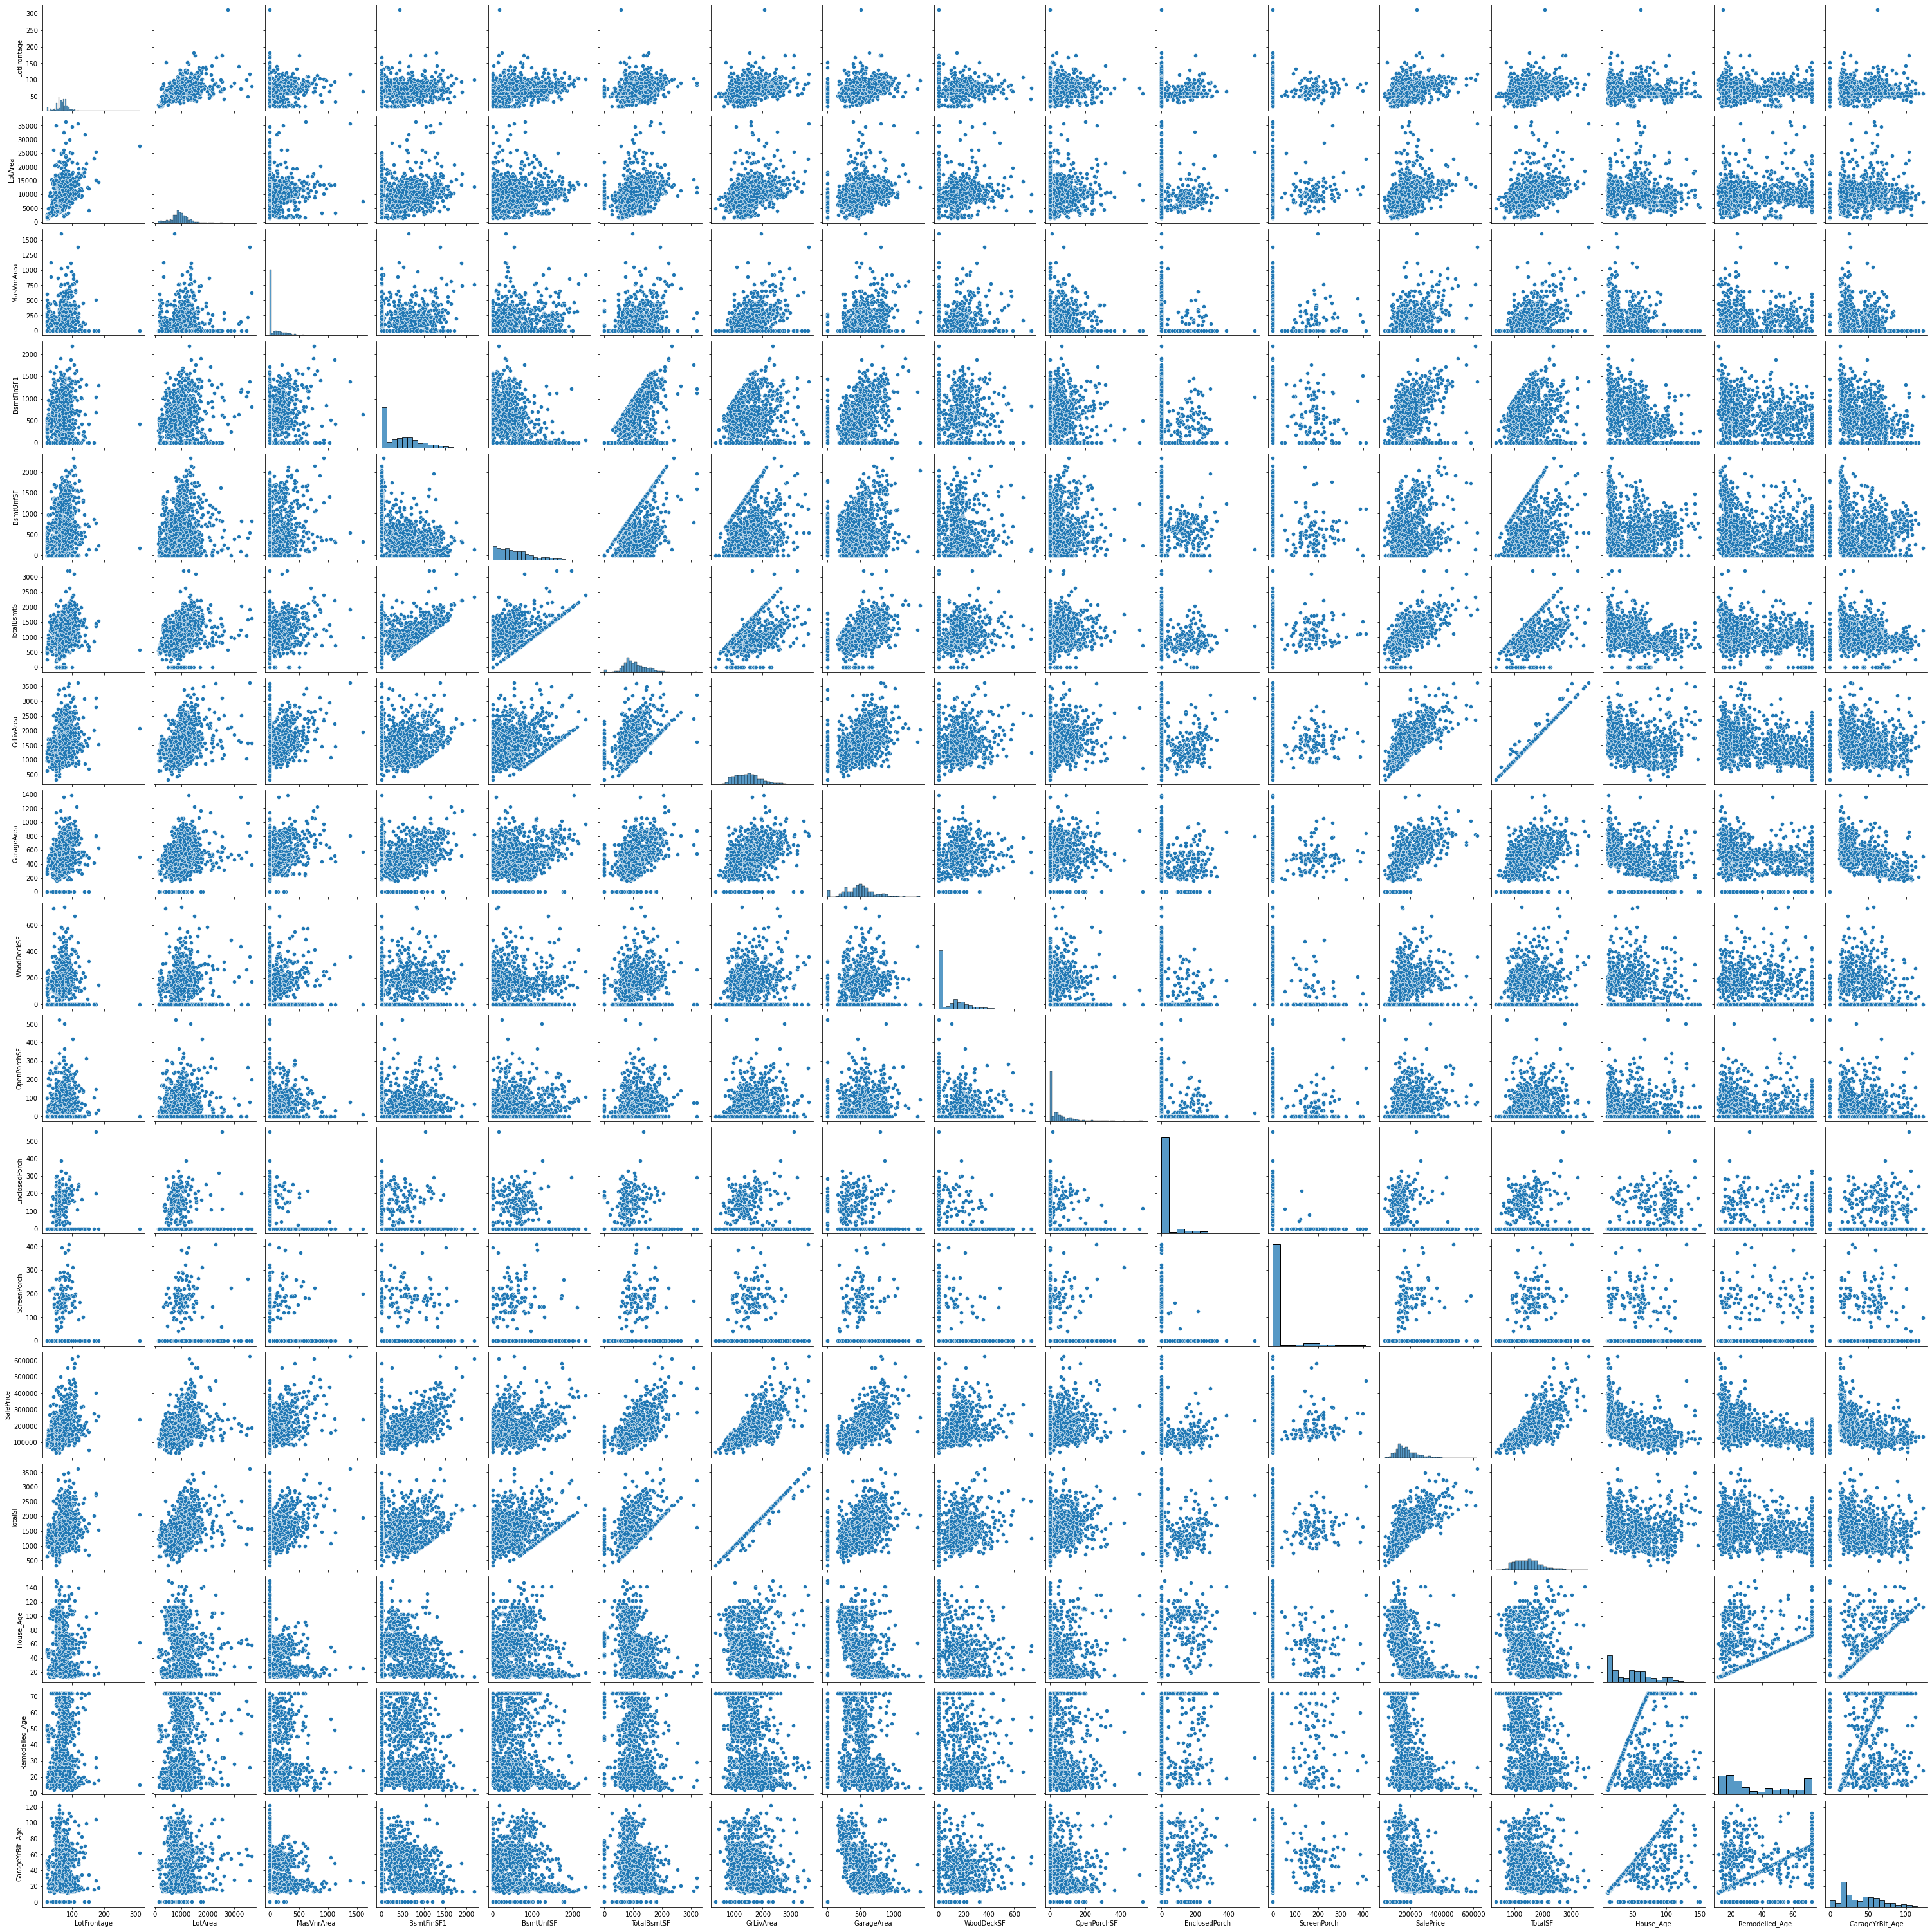

In [48]:
# Pairwise scatter plot
plt.figure(figsize=(20, 20))
sns.pairplot(Housing_Price[num_col])
plt.show()

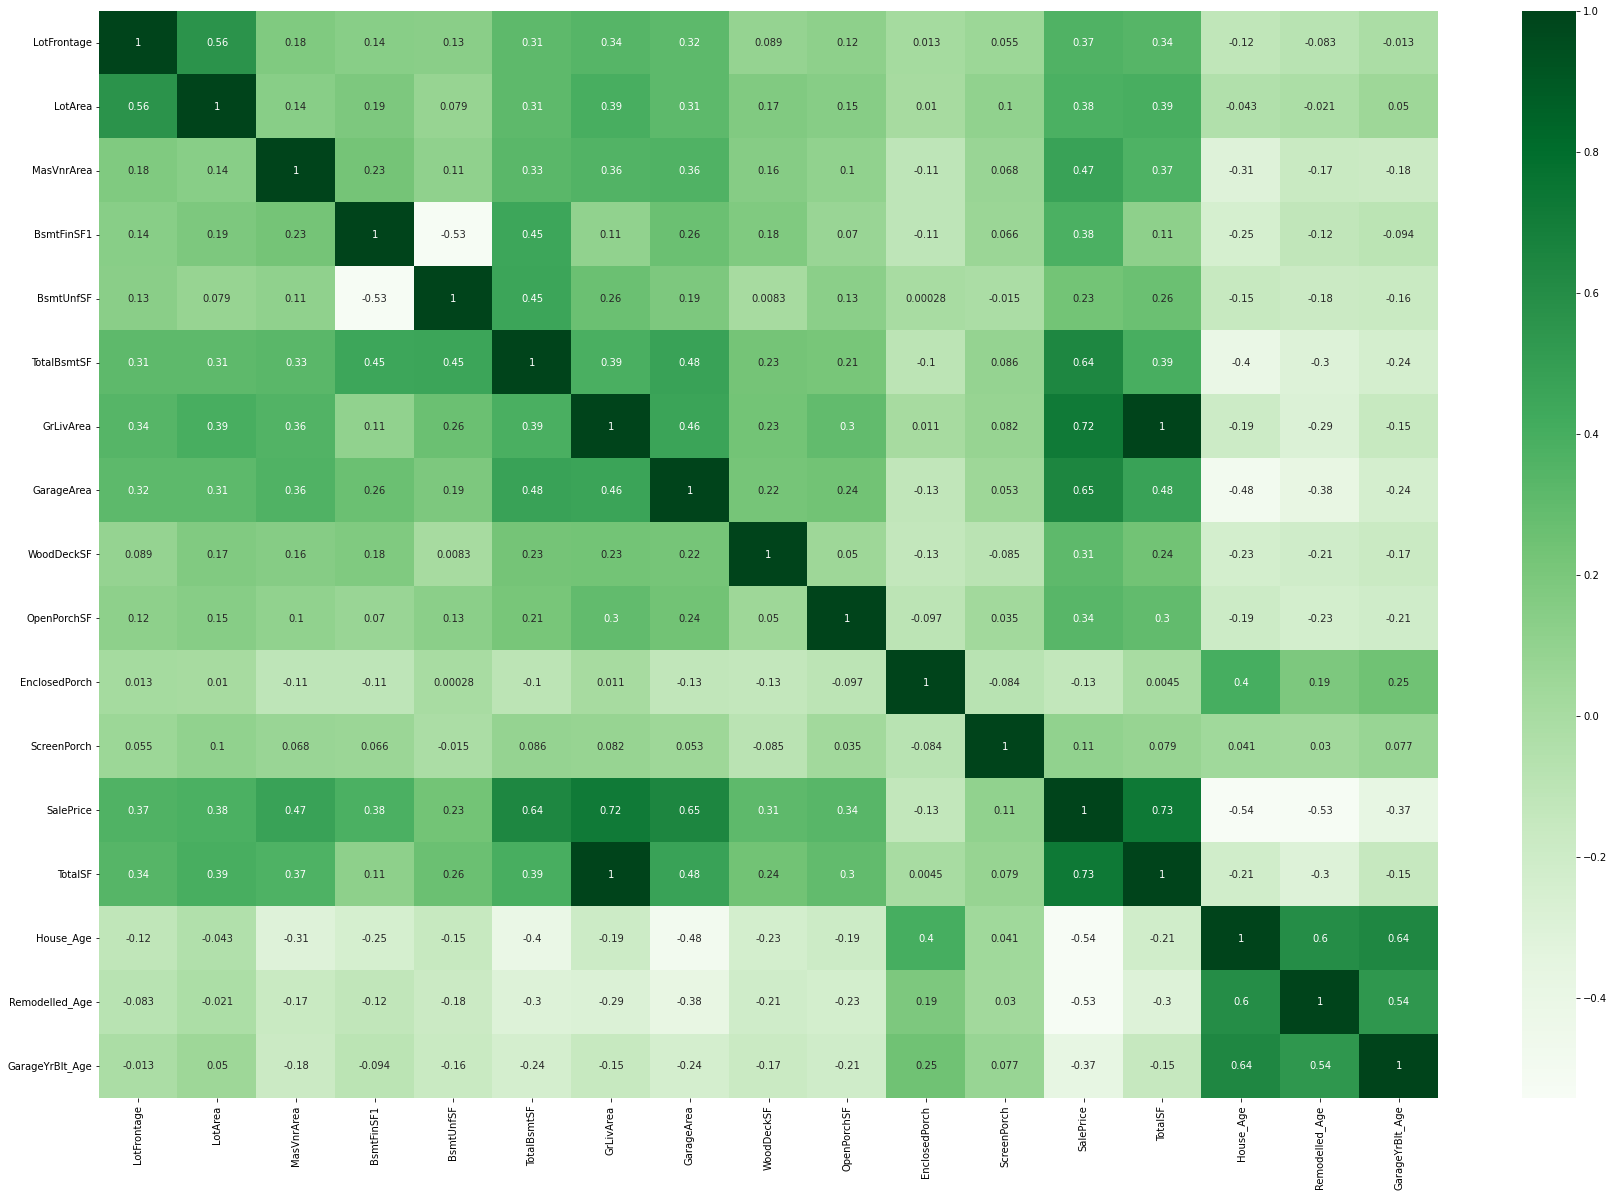

In [49]:
# Heatmap to visualise the correlation

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show()

**Observation:**
- GrLivArea and TotalSF are highly correlated

In [50]:
# Since GrLivArea and TotalSF are highly correlated dropping one of the variable
Housing_Price.drop('GrLivArea',axis=1,inplace=True)

In [51]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in Housing_Price.columns:
    if Housing_Price[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars']
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'TotalSF', 'House_Age', 'Remodelled_Age', 'GarageYrBlt_Age']


In [52]:
# Mapping ordinal variables...
Housing_Price['ExterQual'] = Housing_Price['ExterQual'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
Housing_Price['BsmtQual'] = Housing_Price['BsmtQual'].map({'NB':0,'Po':0,'Fa':1,'TA':1,'Gd':2,'Ex':2})
Housing_Price['BsmtCond'] = Housing_Price['BsmtCond'].map({'NB':0,'Po':0,'Fa':1,'TA':1,'Gd':2,'Ex':2})
Housing_Price['BsmtExposure'] = Housing_Price['BsmtExposure'].map({'NB':0,'No':0,'Mn':0,'Av':1,'Gd':1})
Housing_Price['BsmtFinType1'] = Housing_Price['BsmtFinType1'].map({'NB':0,'Unf':0,'LwQ':0,'Rec':1,'BLQ':0,'ALQ':1,'GLQ':1})
Housing_Price['HeatingQC'] = Housing_Price['HeatingQC'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
Housing_Price['KitchenQual'] = Housing_Price['KitchenQual'].map({'Po':0,'Fa':0,'TA':1,'Gd':1,'Ex':1})
Housing_Price['GarageFinish'] = Housing_Price['GarageFinish'].map({'NG':0,'Unf':0,'RFn':1,'Fin':1})

In [53]:
# Creating ordinal variables as a list
cordinal=['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish']

In [54]:
# Calculating the remaining nominal variables to create dummies
cat_col1=set(cat_col).difference(set(cordinal))

In [55]:
# Creating dummies for other categorical variables
for i in cat_col1:
    Dummies = pd.get_dummies(Housing_Price[i], drop_first = True)
    Dummies = Dummies.add_prefix(f'{i}_')
    Housing_Price = pd.concat([Housing_Price, Dummies], axis =1)
    Housing_Price.drop(i, axis = 1, inplace = True)

In [56]:
# Head of the final data frame
Housing_Price.head()

LotFrontage  LotArea  MasVnrArea  ExterQual  BsmtQual  BsmtCond  \
0         65.0     8450       196.0          1         2         1   
1         80.0     9600         0.0          1         2         1   
2         68.0    11250       162.0          1         2         1   
3         60.0     9550         0.0          1         1         2   
4         84.0    14260       350.0          1         2         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             0             1         706        150          856          1   
1             1             1         978        284         1262          1   
2             0             1         486        434          920          1   
3             0             1         216        540          756          1   
4             1             1         655        490         1145          1   

   KitchenQual  GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0            1             1         548           0           61   
1            1             1         460         298            0   
2            1             1         608           0           42   
3            1             0         642           0           35   
4            1             1         836         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  TotalSF  House_Age  Remodelled_Age  \
0              0            0     208500     1710         19              19   
1              0            0     181500     1262         46              46   
2              0            0     223500     1786         21              20   
3            272            0     140000     1717        107              52   
4              0            0     250000     2198         22              22   

   GarageYrBlt_Age  Fireplaces_1  Fireplaces_2  Fireplaces_3  \
0             19.0             0             0             0   
1             46.0             1             0             0   
2             21.0             1             0             0   
3             24.0             1             0             0   
4             22.0             1             0             0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  ...  ExterCond_Gd  ExterCond_TA  BsmtFullBath_1  \
0                     0  ...             0             1    

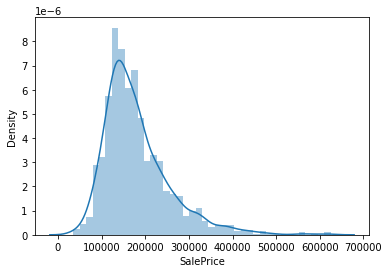

In [57]:
# Distribution of target variable
sns.distplot(Housing_Price['SalePrice'])
plt.show()

**Observation:**
- It is slightly skewed 

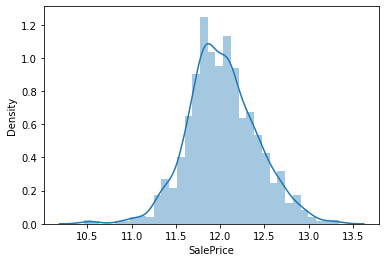

In [58]:
# By transforming into log seeing the distribution
sns.distplot(np.log(Housing_Price['SalePrice']))
plt.show()

**Observation:**
- Now its almost normally distributed

In [59]:
# Assigning log values
Housing_Price['SalePrice_Log'] = np.log(Housing_Price['SalePrice'])

In [60]:
# Defining X and y variables
X = Housing_Price.drop(['SalePrice_Log','SalePrice'],axis=1)
y = Housing_Price['SalePrice_Log']

# Splitting dataset to test and train

In [61]:
# Splitting Train and Test in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

# Scaling of test and train data

In [62]:
# # Using MinMax scaler to standardise the data..
scaler = MinMaxScaler()

num_col.remove('SalePrice')

# Fit and transform on the train data
X_train[num_col]=scaler.fit_transform(X_train[num_col])

# Transforming to test data
X_test[num_col]=scaler.transform(X_test[num_col])

In [63]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  ExterQual  BsmtQual  BsmtCond  \
643      0.202055  0.269688    0.164375          1         1         1   
1059     0.181507  0.283381    0.300000          1         1         1   
936      0.157534  0.249517    0.000000          1         2         1   
347      0.178082  0.463068    0.018750          1         1         1   
839      0.167808  0.297358    0.000000          1         1         1   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
643              0             1    0.225320   0.000000     0.243294   
1059             0             1    0.135740   0.000000     0.266376   
936              0             1    0.380713   0.146832     0.366812   
347              0             0    0.580439   0.089041     0.461011   
839              0             0    0.160878   0.178082     0.239551   

      HeatingQC  KitchenQual  GarageFinish  GarageArea  WoodDeckSF  \
643           1            1             1    0.340708    0.285714   
1059          1            1             0    0.318584    0.000000   
936           1            1             1    0.409292    0.000000   
347           1            1             0    0.367257    0.000000   
839           1            1             0    0.176991    0.000000   

      OpenPorchSF  EnclosedPorch  ScreenPorch   TotalSF  House_Age  \
643      0.000000        0.00000          0.0  0.413106   0.297101   
1059     0.000000        0.03442          0.0  0.532284   0.565217   
936      0.078394        0.00000          0.0  0.278188   0.050725   
347      0.076482        0.00000          0.0  0.367491   0.362319   
839      0.000000        0.00000          0.0  0.278188   0.463768   

      Remodelled_Age  GarageYrBlt_Age  Fireplaces_1  Fireplaces_2  \
643         0.683333         0.434426             0             0   
1059        1.000000         0.368852             1             0   
936         0.116667         0.155738             0             0   
347         0.833333         0.508197             0             1   
839         0.250000         0.622951             0             0   

      Fireplaces_3  Neighborhood_Blueste  Neighborhood_BrDale  \
643              0                     0                    0   
1059             0                     0                    0   
936              0                     0                    0   
347              0                     0                    0   
839              0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
643                      0                     0                     0   
1059                     0                     0                     0   
936                      0                     0                     0   
347                      0                     0                     0   
839                      0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
643                      0                     0                     0   
1059                     1                     0                     0   
936                      0                     0                     0   
347                      0                     0                     0   
839                      0                     1                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
643                     0                     0                     0   
1059                    0                     0                     0   
936                     0                     0                     0   
347                     0                     0                     0   
839                     0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  ...  \
643                    0                     0                    1  ...   

# Model building and evaluation using Ridge and Lasso regression

In [64]:
# Fitting linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

MSEs=cross_val_score(lm,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print("The negative mean square error for linear regression is", mean_MSE)

The negative mean square error for linear regression is -5.184247234239991e+18


In [65]:
# Predicting the target variable for train
y_train_pred = lm.predict(X_train)

# R2 for train set
print("R2 for Training Set: ",r2_score(y_true=y_train, y_pred=y_train_pred))

R2 for Training Set:  0.9370110635748472


# Ridge regression

In [66]:
# Using cross validation to tune hyperparameter alpha in ridge regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,100.0,1000.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0,
                                   1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.043794      0.006923         0.021051        0.002435      0.0001   
1       0.026983      0.001538         0.012164        0.001830       0.001   
2       0.029691      0.002273         0.012201        0.001171        0.01   
3       0.032951      0.009085         0.011902        0.000447        0.05   
4       0.038994      0.006762         0.013220        0.003032         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099230          -0.086994          -0.105457   
1   {'alpha': 0.001}          -0.099125          -0.086969          -0.105462   
2    {'alpha': 0.01}          -0.098225          -0.086736          -0.105491   
3    {'alpha': 0.05}          -0.095748          -0.086022          -0.105440   
4     {'alpha': 0.1}          -0.093791          -0.085501          -0.105385   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093870          -0.098289        -0.096768        0.006129   
1          -0.093853          -0.098209        -0.096724        0.006128   
2          -0.093710          -0.097463        -0.096325        0.006127   
3          -0.093296          -0.095162        -0.095133        0.006213   
4          -0.092940          -0.093672        -0.094258        0.006368   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.067347           -0.068615   
1               22           -0.067352           -0.068619   
2               21           -0.067413           -0.068651   
3               20           -0.067663           -0.068792   
4               19           -0.067945           -0.068941   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.063345           -0.069162           -0.067673   
1           -0.063353           -0.069164           -0.067686   
2           -0.063431           -0.069181           -0.067810   
3           -0.063700           -0.069252           -0.068272   
4           -0.063942           -0.069305           -0.068727   

   mean_train_score  std_train_score  
0         -0.067228         0.002047  
1         -0.067235         0.002046  
2         -0.067297         0.002030  
3         -0.067536         0.001990  
4         -0.067772         0.001966

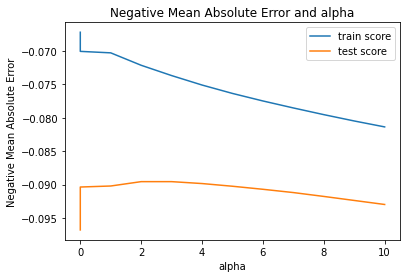

In [68]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [69]:
# Checking the best parameter(Alpha value)
print("The best alpha value for ridge is: ",model_cv.best_params_)

The best alpha value for ridge is:  {'alpha': 3.0}


In [70]:
# The best negative mean square error
print("The negative mean square error for Ridge regression is: ",model_cv.best_score_)

The negative mean square error for Ridge regression is:  -0.0895537570172302


In [71]:
# Final model with best parameters
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

# Fitting the model
ridge.fit(X_train, y_train)

# Predicting the target variable for train
y_pred_train = ridge.predict(X_train)

# R2 score for train
print('R2 score of Training Data:',r2_score(y_train,y_pred_train))

# Predicting the target variable for test
y_pred_test = ridge.predict(X_test)

# R2 score for test
print('R2 score of Test Data:',r2_score(y_test,y_pred_test))

R2 score of Training Data: 0.9279351625849251
R2 score of Test Data: 0.900263317171446


In [72]:
# The ridge coefficients stored in variable
model_parameter = list(ridge.coef_)

# Inserting the intercept
model_parameter.insert(0,ridge.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
ridge = pd.DataFrame(list(zip(cols,model_parameter)))
ridge.columns = ['Feature','Co_efficient']

# Sorting the dataframe
ridge.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0                Constant     11.319734
20                TotalSF      0.395914
11            TotalBsmtSF      0.235226
79          OverallQual_9      0.185955
15             GarageArea      0.161883
2                 LotArea      0.161308
9              BsmtFinSF1      0.160927
80         OverallQual_10      0.149939
48   Neighborhood_StoneBr      0.143996
125           MSZoning_FV      0.132578

**Observation:**

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - LotArea  

# Making the model for subjective question (Doubling the alpha)

In [73]:
# Doubling the alpha value and checking the model
alpha = 2*(model_cv.best_params_['alpha'])

# Fitting the model
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Predicting the target variable for train
y_pred_train = ridge.predict(X_train)

# R2 score for train
print('R2 score of Training Data:',r2_score(y_train,y_pred_train))

# Predicting the target variable for test
y_pred_test = ridge.predict(X_test)

# R2 score for test
print('R2 score of Test Data:',r2_score(y_test,y_pred_test))

R2 score of Training Data: 0.9222955368887549
R2 score of Test Data: 0.8940688785505155


In [74]:
# The ridge coefficients stored in variable
model_parameter = list(ridge.coef_)

# Inserting the intercept
model_parameter.insert(0,ridge.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
ridge = pd.DataFrame(list(zip(cols,model_parameter)))
ridge.columns = ['Feature','Co_efficient']

# Sorting the dataframe
ridge.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0               Constant     11.401165
20               TotalSF      0.308264
11           TotalBsmtSF      0.195251
79         OverallQual_9      0.167799
9             BsmtFinSF1      0.155246
15            GarageArea      0.145800
2                LotArea      0.138539
80        OverallQual_10      0.125335
48  Neighborhood_StoneBr      0.124685
32  Neighborhood_Crawfor      0.103679

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - BsmtFinSF1
 - GarageArea

# Lasso regression

In [75]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
# params = {'alpha': [0.0001,0.0005,0.0009, 0.001,0.002,0.003,0.004, 0.01, 0.02, 0.05]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.193790      0.062862         0.014012        0.003650      0.0001   
1       0.050924      0.007922         0.013976        0.002582       0.001   
2       0.036816      0.005878         0.012650        0.003754        0.01   
3       0.020288      0.006467         0.009287        0.003760        0.05   
4       0.026704      0.008000         0.018590        0.007595         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087606          -0.083658          -0.104103   
1   {'alpha': 0.001}          -0.082047          -0.080968          -0.100479   
2    {'alpha': 0.01}          -0.128152          -0.129791          -0.142809   
3    {'alpha': 0.05}          -0.210936          -0.205310          -0.236615   
4     {'alpha': 0.1}          -0.272333          -0.276809          -0.308112   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.089143          -0.089330        -0.090768        0.006972   
1          -0.083848          -0.087226        -0.086913        0.007107   
2          -0.125243          -0.138534        -0.132906        0.006645   
3          -0.200247          -0.201276        -0.210877        0.013406   
4          -0.262710          -0.262695        -0.276532        0.016719   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.069426           -0.070623   
1                1           -0.078233           -0.078938   
2                3           -0.130347           -0.129246   
3                4           -0.210151           -0.211633   
4                5           -0.275121           -0.276509   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065816           -0.070303           -0.070792   
1           -0.074465           -0.078038           -0.079080   
2           -0.129257           -0.128957           -0.128809   
3           -0.207978           -0.211506           -0.211048   
4           -0.274429           -0.276239           -0.277498   

   mean_train_score  std_train_score  
0         -0.069392         0.001849  
1         -0.077751         0.001691  
2         -0.129323         0.000540  
3         -0.210463         0.001347  
4         -0.275959         0.001076

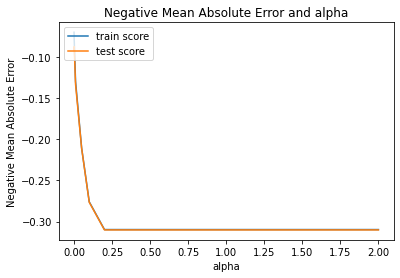

In [77]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
# Checking the best parameter(Alpha value)
print("The best alpha value for lasso is: ",model_cv.best_params_)

The best alpha value for lasso is:  {'alpha': 0.001}


In [79]:
# The best negative mean square error
print("The negative mean square error for lasso regression is: ",model_cv.best_score_)

The negative mean square error for lasso regression is:  -0.08691343233770694


In [80]:
# Storing the best alpha value in a variable
alpha = model_cv.best_params_['alpha']

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.9159948418610981
R2 score of Test Data: 0.9053475593045004


In [81]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0               Constant     11.396522
20               TotalSF      0.747281
11           TotalBsmtSF      0.283270
79         OverallQual_9      0.219472
15            GarageArea      0.178230
80        OverallQual_10      0.173726
9             BsmtFinSF1      0.134623
2                LotArea      0.128335
32  Neighborhood_Crawfor      0.112161
78         OverallQual_8      0.108668

**Observation:**

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - OverallQual_10 

In [82]:
# Assigning sorted dataframe to new variable
l = lasso.sort_values(by='Co_efficient',ascending=False)

In [83]:
# Taking top 5 features for the subjective question
var=l['Feature'].head(6)
var.drop(0,axis=0,inplace=True)

In [84]:
# checking the var
var

20           TotalSF
11       TotalBsmtSF
79     OverallQual_9
15        GarageArea
80    OverallQual_10
Name: Feature, dtype: object

# Making the model for subjective question (Doubling the alpha)

In [85]:
# Doubling the alpha value and stored in a variable
alpha = 2*(model_cv.best_params_['alpha'])

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.8979859727019294
R2 score of Test Data: 0.8883890754667662


In [86]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0               Constant     11.411462
20               TotalSF      0.741974
11           TotalBsmtSF      0.270682
15            GarageArea      0.191185
79         OverallQual_9      0.187374
9             BsmtFinSF1      0.122780
78         OverallQual_8      0.098044
32  Neighborhood_Crawfor      0.083973
80        OverallQual_10      0.078303
2                LotArea      0.053869

**Observation:**

The top 5 features being:
 - TotalSF
 - TotalBsmtSF
 - GarageArea
 - OverallQual_9
 - BsmtFinSF1 

In [87]:
lasso.sort_values(by='Co_efficient',ascending=False)

Feature  Co_efficient
0          Constant     11.411462
20          TotalSF      0.741974
11      TotalBsmtSF      0.270682
15       GarageArea      0.191185
79    OverallQual_9      0.187374
..              ...           ...
164   GarageType_NG     -0.074499
59    OverallCond_4     -0.083180
21        House_Age     -0.101826
22   Remodelled_Age     -0.112756
58    OverallCond_3     -0.140464

[189 rows x 2 columns]

# Removing top 5 features and checking lasso model (subjective question)

In [88]:
# Droppingfirst 5 features and checking the lasso model again
X_train.drop(var,axis=1,inplace=True)
X_test.drop(var,axis=1,inplace=True)

In [89]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
# params = {'alpha': [0.0001,0.0005,0.0009, 0.001,0.002,0.003,0.004, 0.01, 0.02, 0.05]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.128155      0.038862         0.011387        0.004970      0.0001   
1       0.042300      0.003751         0.011245        0.000649       0.001   
2       0.029808      0.002070         0.012167        0.001809        0.01   
3       0.028765      0.002544         0.011741        0.000792        0.05   
4       0.029703      0.005891         0.012166        0.001851         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098512          -0.094079          -0.119428   
1   {'alpha': 0.001}          -0.098985          -0.094271          -0.118117   
2    {'alpha': 0.01}          -0.146882          -0.142547          -0.160000   
3    {'alpha': 0.05}          -0.210936          -0.205310          -0.236615   
4     {'alpha': 0.1}          -0.272333          -0.276809          -0.308112   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.103799          -0.097159        -0.102595        0.008984   
1          -0.097886          -0.105228        -0.102897        0.008389   
2          -0.138955          -0.153427        -0.148362        0.007558   
3          -0.200247          -0.201276        -0.210877        0.013406   
4          -0.262710          -0.262695        -0.276532        0.016719   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.079315           -0.081404   
1                2           -0.092298           -0.092160   
2                3           -0.144108           -0.145600   
3                4           -0.210151           -0.211633   
4                5           -0.275121           -0.276509   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.075068           -0.077799           -0.080925   
1           -0.086658           -0.090033           -0.091950   
2           -0.142445           -0.143908           -0.143221   
3           -0.207978           -0.211506           -0.211048   
4           -0.274429           -0.276239           -0.277498   

   mean_train_score  std_train_score  
0         -0.078902         0.002300  
1         -0.090620         0.002144  
2         -0.143856         0.001049  
3         -0.210463         0.001347  
4         -0.275959         0.001076

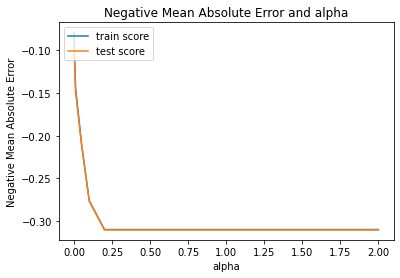

In [91]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [92]:
# Checking the best parameter(Alpha value)
print("The best alpha value for lasso is: ",model_cv.best_params_)

The best alpha value for lasso is:  {'alpha': 0.0001}


In [93]:
# The best negative mean square error
print("The negative mean square error for lasso regression is: ",model_cv.best_score_)

The negative mean square error for lasso regression is:  -0.10259515577400606


In [94]:
# Storing the best alpha value in a variable
alpha = model_cv.best_params_['alpha']

# Fitting the lasso model on best alpha
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

# Predicting the target variable for train
y_train_pred = lasso.predict(X_train)

# Predicting the target variable for train
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting the target variable for test
y_test_pred = lasso.predict(X_test)

# Predicting the target variable for test
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.9213824736735285
R2 score of Test Data: 0.8839073000658829


In [95]:
# The lasso coefficients stored in variable
model_parameter = list(lasso.coef_)

# Inserting the intercept
model_parameter.insert(0,lasso.intercept_)

# Assigning the columns to a variable
cols = X.columns

# Inserting the constant
cols=cols.insert(0,'Constant')

# Creating a dataframe for the features with coefficients
lasso = pd.DataFrame(list(zip(cols,model_parameter)))
lasso.columns = ['Feature','Co_efficient']

# Sorting the dataframe
lasso.sort_values(by='Co_efficient',ascending=False).head(10)

Feature  Co_efficient
0               Constant     11.456995
9             BsmtFinSF1      0.390817
120     Foundation_Stone      0.363508
103       TotRmsAbvGrd_7      0.340658
122       KitchenAbvGr_1      0.314885
123       KitchenAbvGr_2      0.306622
121      Foundation_Wood      0.284414
2                LotArea      0.275378
10             BsmtUnfSF      0.269853
45   Neighborhood_Sawyer      0.201666

**Observation**

The top 5 features being:
 - BsmtFinSF1
 - RoofStyle_Gable
 - TotRmsAbvGrd_9
 - RoofStyle_Hip
 - RoofStyle_Mansard

In [96]:
lasso.sort_values(by='Co_efficient',ascending=False)

Feature  Co_efficient
0             Constant     11.456995
9           BsmtFinSF1      0.390817
120   Foundation_Stone      0.363508
103     TotRmsAbvGrd_7      0.340658
122     KitchenAbvGr_1      0.314885
..                 ...           ...
72       OverallQual_2     -0.212028
18       EnclosedPorch     -0.212922
55     MasVnrType_None     -0.233825
71     HouseStyle_SLvl     -0.247020
70   HouseStyle_SFoyer     -0.314862

[184 rows x 2 columns]

# Conclusion

#### The top 5 features which explains the model very well are:

 - TotalSF
 - TotalBsmtSF
 - OverallQual_9
 - GarageArea
 - LotArea


 #### The Ridge regression:

- alpha = 2
- R2 for training data = 0.93
- R2 for test data = 0.90

#### The Lasso regression:

- alpha = 0.001
- R2 for training data = 0.92
- R2 for test data = 0.91
